## Packages

In [118]:
import matplotlib.pyplot as plt
from networkx import nx
import numpy as np
import scipy
import math
from random import randint

## Part 1.1

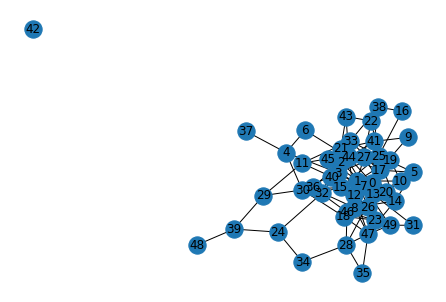

In [153]:
# Generate p-ER random graph
Gp = nx.erdos_renyi_graph(50,0.1) 
nx.draw(Gp, with_labels=True) 
plt.show() 

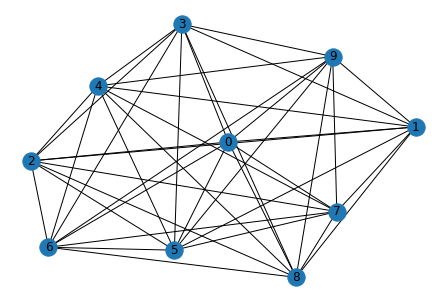

In [61]:
# Generate r-regular random graph
Gr = nx.random_regular_graph(8, 10)
nx.draw(Gr, with_labels=True)
plt.show()

## Part 1.2

In [76]:
# Algebraic method 1 (irreducibility)
def method1(G):
    # Adjacency matrix
    M = nx.to_numpy_matrix(G)
    Mt = np.identity(len(M))
    for i in range(1,len(M)):
        Mt += np.linalg.matrix_power(M,i)
    return np.all(Mt) > 0
method1(Gp)

In [102]:
# Algebraic method 2 (eigenvalue of the Laplacian matrix)
def method2(G):
    L = nx.laplacian_matrix(G)
    # Convert scipy matrix to numpy array
    L = scipy.sparse.csr_matrix.toarray(L)
    eigv = np.linalg.eigvals(L)
    # Check
    return (np.sort(eigv)[1]>0)
method2(Gp)

In [156]:
# Breadth-frst search algorithm
def BFS(G):
    # Make a list of all the nodes connected to the staring one in a BFS way.
    l = list(nx.bfs_edges(G, randint(0,len(G)-1)))
    # If l contains all nodes it must have the length of G-1 (the node isn't connected to itself)
    if len(l) == len(G)-1:
        return True
    else:
        return False
BFS(Gp)

False

## Part 1.3

## Part 1.4